# Analysis of COVID-19 Data from Brazil

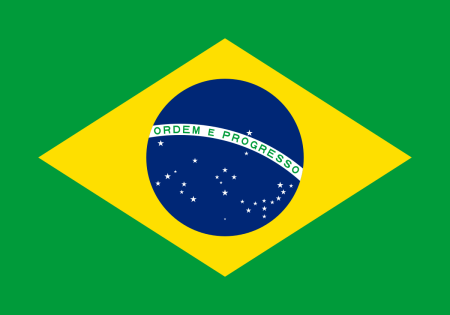

COVID-19 Background: Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 

Data Source:[World Heath Organization](https://www.who.int/health-topics/coronavirus#tab=tab_1)


# Import Data from S3 Bucket

In [17]:
%matplotlib inline
import pandas as pd

In [19]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.2 MB/s eta 0:00:00ta 0:00:01


In [21]:
df = pandas.read_excel('s3://patterson-241-2023-python/covid_data (2).xls')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


# Brazil Data

In [22]:
Brazil_data = df.loc[df['countriesAndTerritories'] == 'Brazil']
Brazil_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
7991,14/12/2020,14,12,2020,21825,279,Brazil,BR,BRA,211049519.0,America,278.234228
7992,13/12/2020,13,12,2020,43900,686,Brazil,BR,BRA,211049519.0,America,279.486541
7993,2020-12-12 00:00:00,12,12,2020,54428,672,Brazil,BR,BRA,211049519.0,America,283.287544
7994,2020-11-12 00:00:00,11,12,2020,53347,770,Brazil,BR,BRA,211049519.0,America,273.669896
7995,2020-10-12 00:00:00,10,12,2020,53453,836,Brazil,BR,BRA,211049519.0,America,266.215248


# Question 1: How many cases of COVID-19 total were in Brazil?

In [23]:
Brazil_data.sum()['cases']

/tmp/ipykernel_7326/1378579182.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Brazil_data.sum()['cases']


6901952

<AxesSubplot: xlabel='countriesAndTerritories'>

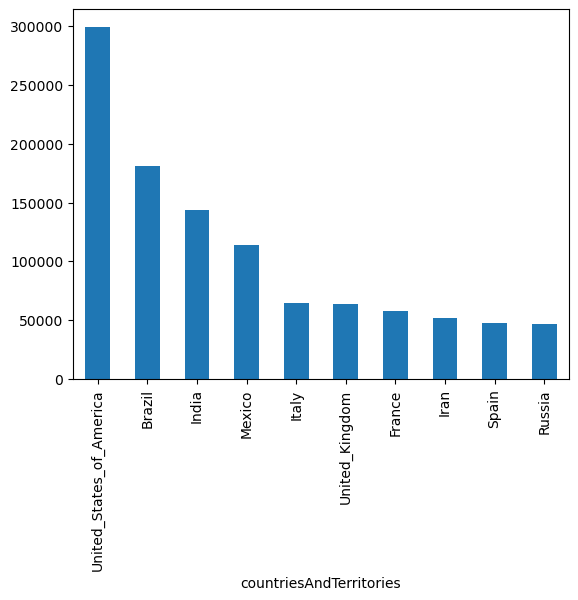

In [27]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

Brazil had a total of 6,901,952 COVID-19 cases in the year of 2020. This bar graph was added to show a comparison of Brazils total COVID-19 cases in comparison to other countries with high COVID-19 numbers as well.  Brazil had the second highest amount of cases following the United States in 2020. 

# Question 2: What month was the COVID- 19 data the highest in Brazil?

/tmp/ipykernel_7326/1862868881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_cases_per_day = Brazil_data.groupby('month').sum()['cases']


<AxesSubplot: xlabel='month'>

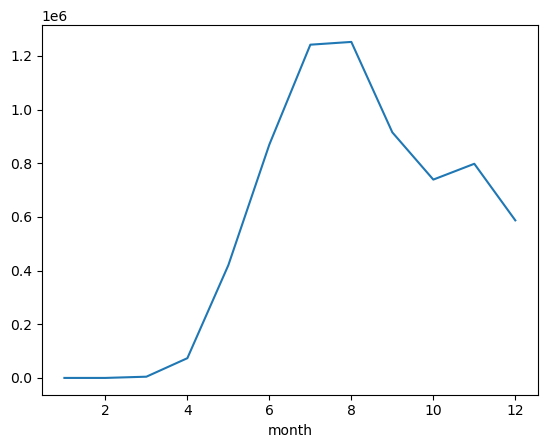

In [32]:
sum_cases_per_day = Brazil_data.groupby('month').sum()['cases']
sum_cases_per_day.plot()

This line graph is answering the question of what month was the COVID-19 data the highest in Brazil.  According to this it looks like in August the number of cases in Brazil was over 1.2 million.  June and July as well were extremely close to being the highest because they are also above 1.2 million cases.  There was a small spike that made August the month with the highest number of cases. This was suprising because we did not expect these numbers to be so high. There was a huge decrease after August up until December of 2020. This graph is showing just how quickly the number of COVID-19 cases in a country can change and drastically increase or decrease from month to month.

# Question 3: How many deaths total did Brazil have from COVID-19?

In [31]:
Brazil_data.sum()['deaths']

/tmp/ipykernel_7326/3093324216.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Brazil_data.sum()['deaths']


181402

/tmp/ipykernel_7326/1880913069.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_deaths_per_day=Brazil_data.groupby('month').sum()['deaths']


<AxesSubplot: xlabel='month'>

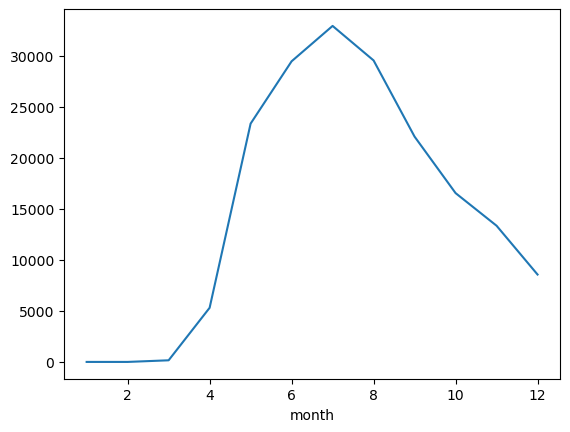

In [30]:
sum_deaths_per_day=Brazil_data.groupby('month').sum()['deaths']

sum_deaths_per_day.plot()

The sum of COVID-19 deaths in Brazil is 181,402 in 2020. This line graph is giving a vizualization of the deaths spread out by month.  We thought this would give a better undertsanding on how many deaths were in each month of 2020.  Just like the number of cases, the deaths also spiked around June through August and these months were much higher than months before and after.  June through August was when Brazil was hit the hardest with COVID-19 and it is important to recognize this when analyzing the data. 

# Question 4: What was the number of cases compared with deaths in Brazil by COVID-19 over time?

<AxesSubplot: xlabel='cases', ylabel='deaths'>

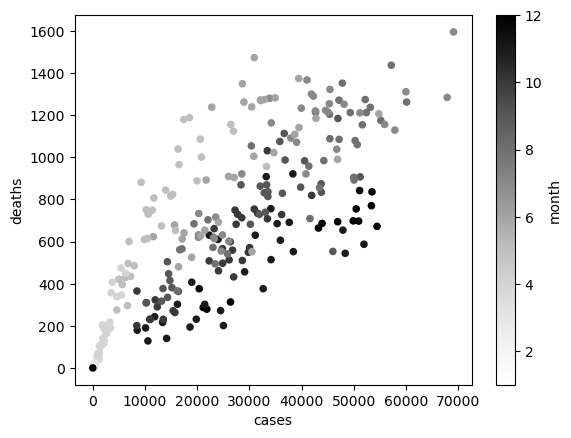

In [33]:
Brazil_data.plot.scatter(x='cases',y='deaths',c= 'month')

The scatterplot above is demonstrating the amount of deaths related to the number of COVID-19 cases in Brazil. The use of colors helps to determine whether the cases and deaths took place in earlier or later months.  The darker the dot the later the month in the year. The largest amount of deaths in Brazil happened mostly between the months of Febuary and August reaching up to around 1000 deaths with multiple dots clustered around the area.  The numbers start to decrease as it moves into September through December. This is a great representation of the relationship between the number of cases and the number of deaths in Brazil throughout the year of 2020.

# Conclusions and Limitations

In conclusion, Brazil was hit by COVID-19 pretty hard and they experienced the second highest amount of cases in the world below the United States. The months of June through August were when Brazil experienced the most cases and deaths from COVID-19. Comparing the data of cases and deaths through a scatter plot helped vizualize how the number of cases are comparing to the number of deaths through the months of 2020. Regarding limitations, we were limited to only having access to the COVID-19 data in 2020 so it isnt including years prior or after 2020. This leaves out the true number of deaths and cases that Brazil had all throughout COVID-19. There also could be potential gaps in the data that need to be recognized. Improvements could include adding data from more months throughout other years than just 2020. Looking more in depth into the effect that COVID-19 had on Brazil could improve this project as well. Also by having more skills in programming because we only really know the basics in programming. 